<a href="https://colab.research.google.com/github/HakujouRyu/DS-Unit-2-Regression-Classification/blob/master/module1/assignment_regression_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

### Setup

In [48]:
import os, sys
in_colab = 'google.colab' in sys.modules

# If you're in Colab...
if in_colab:
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Install required python packages
    !pip install -r requirements.txt
    
    # Change into directory for module
    os.chdir('module1')

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification
 * branch            master     -> FETCH_HEAD
Already up to date.


In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv('../data/apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

### My work:

#### Looking

In [52]:
#We'll start here to see current features and some sample values
df.head()

bathrooms  bedrooms  ... wheelchair_access common_outdoor_space
0        1.5         3  ...                 0                    0
1        1.0         2  ...                 0                    0
2        1.0         1  ...                 0                    0
3        1.0         1  ...                 0                    0
4        1.0         4  ...                 0                    0

[5 rows x 34 columns]

In [53]:
df.describe()

bathrooms      bedrooms  ...  wheelchair_access  common_outdoor_space
count  48818.000000  48818.000000  ...       48818.000000          48818.000000
mean       1.201790      1.537158  ...           0.027224              0.026240
std        0.470707      1.106078  ...           0.162736              0.159851
min        0.000000      0.000000  ...           0.000000              0.000000
25%        1.000000      1.000000  ...           0.000000              0.000000
50%        1.000000      1.000000  ...           0.000000              0.000000
75%        1.000000      2.000000  ...           0.000000              0.000000
max       10.000000      8.000000  ...           1.000000              1.000000

[8 rows x 29 columns]

#### Plotting

In [0]:
import plotly.express as px

In [55]:
px.scatter(df,x='bathrooms', y='price' , trendline='ols')

In [56]:
px.scatter(df, x='bedrooms', y='price', trendline='ols')
#This is odd though, who rents an apt w/o a bedroom.
#Studio maybe?

In [57]:
px.scatter(df, x='doorman', y='price', trendline='ols')
#Not much to look at there

In [58]:
df.corr()

bathrooms  ...  common_outdoor_space
bathrooms              1.000000  ...             -0.003401
bedrooms               0.524077  ...              0.003232
latitude               0.013445  ...             -0.117158
longitude             -0.020129  ...             -0.102952
price                  0.687297  ...              0.011519
elevator               0.132889  ...              0.114884
cats_allowed           0.021484  ...              0.104498
hardwood_floors        0.096929  ...             -0.120485
dogs_allowed           0.024547  ...              0.106074
doorman                0.157179  ...              0.126710
dishwasher             0.172235  ...             -0.086529
no_fee                 0.129553  ...              0.030248
laundry_in_building   -0.013200  ...              0.595203
fitness_center         0.148338  ...              0.196383
pre-war               -0.016209  ...             -0.066844
laundry_in_unit        0.209369  ...             -0.061031
roof_deck              0.102116  ...             -0.016264
outdoor_space          0.144453  ...              0.409599
dining_room            0.233041  ...             -0.042075
high_speed_internet    0.089076  ...             -0.016672
balcony                0.136991  ...             -0.026592
swimming_pool          0.113317  ...             -0.014992
new_construction       0.066828  ...             -0.021080
terrace                0.140769  ...             -0.026357
exclusive             -0.001942  ...              0.033071
loft                   0.014262  ...             -0.030237
garden_patio           0.096285  ...             -0.026622
wheelchair_access      0.066941  ...             -0.017224
common_outdoor_space  -0.003401  ...              1.000000

[29 rows x 29 columns]

Turns out that my intuition was correct, I just happened to pick the three most strongly correlated, but we'll stick with the top two for the rest of the assignment.

#### Linear Regression

In [0]:
#Import the library
from sklearn.linear_model import LinearRegression

In [0]:
#initialise the model
model = LinearRegression()

In [0]:
#Set features and target.
#We'll start with the 2 strongest individually correlated
features = ['bathrooms', 'bedrooms']
target = ['price']
X_train = df[features]
y_train = df[target]

In [62]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
model.coef_

array([[2099.14867224,  385.08418275]])

The coefficient is telling us that when considered together, for every bathroom the price goes up 2k while every bedroom only increases the price by 385 dollars. __Interesting__

In [64]:
model.predict([[1,2]])

array([[3334.20606209]])

In [0]:
def prediction(bath, bed):
    prediction = model.predict([[bath,bed]])
    print(f'An apartment in NYC with {bath} bathrooms and {bed} bedrooms may go for ${prediction}')

In [66]:
prediction(3,6)

An apartment in NYC with 3 bathrooms and 6 bedrooms may go for $[[9072.84013758]]


### Extra

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [137]:
df.columns

Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [0]:
#Get rid of some columns that are str
features_ex = ['bathrooms', 'bedrooms', 'latitude', 'longitude',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space']
X = df[features_ex]

In [0]:
y_ex = df['price']

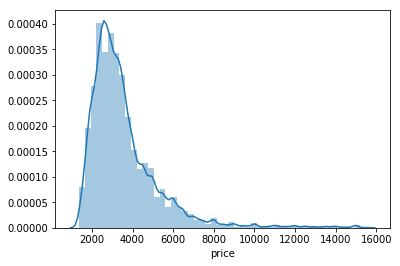

In [175]:
sns.distplot(df['price'])
#Not a very normal dist

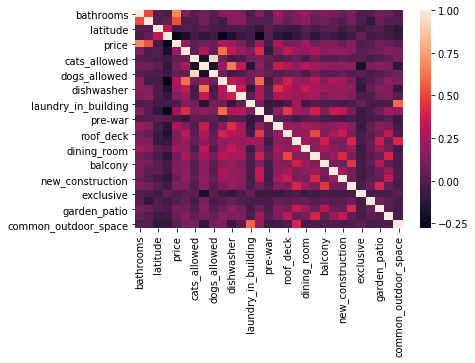

In [176]:
sns.heatmap(df.corr())
#Besides being my new favorit plaid pattern That's a lot to look at.
#Dishwashers are pretty important it seems!

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#Note: This overwrites previous x_train and y_train vars
X_train, X_test, y_train, y_test = train_test_split(X, y_ex, test_size=0.4)

In [0]:
# X_train

In [0]:
# y_train

In [0]:
model_2 = LinearRegression()

In [182]:
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [183]:
model_2.coef_

array([ 1.77374564e+03,  4.85341079e+02,  1.80598553e+03, -1.36438381e+04,
        1.26311759e+02, -3.65462197e+01, -2.31621586e+02,  9.87485162e+01,
        4.94967321e+02,  5.44834551e+01, -1.70891504e+02, -2.54421456e+02,
        1.42492915e+02, -6.31424267e+01,  4.76456521e+02, -1.15136443e+02,
       -1.59958302e+02,  2.59219149e+02, -3.44355873e+02,  3.05751576e+01,
        8.19628618e+01, -1.89257168e+02,  1.35764815e+02,  1.04190002e+02,
        1.41750423e+02,  1.42000697e+00,  1.31806028e+02, -3.34302020e+01])

In [0]:
coeffs = pd.DataFrame(model_2.coef_,X.columns,columns=['Coeff'])

In [189]:
#Make a DF just for ease of use
coeffs

Coeff
bathrooms              1773.745643
bedrooms                485.341079
latitude               1805.985529
longitude            -13643.838135
elevator                126.311759
cats_allowed            -36.546220
hardwood_floors        -231.621586
dogs_allowed             98.748516
doorman                 494.967321
dishwasher               54.483455
no_fee                 -170.891504
laundry_in_building    -254.421456
fitness_center          142.492915
pre-war                 -63.142427
laundry_in_unit         476.456521
roof_deck              -115.136443
outdoor_space          -159.958302
dining_room             259.219149
high_speed_internet    -344.355873
balcony                  30.575158
swimming_pool            81.962862
new_construction       -189.257168
terrace                 135.764815
exclusive               104.190002
loft                    141.750423
garden_patio              1.420007
wheelchair_access       131.806028
common_outdoor_space    -33.430202

In [0]:
predictions = model_2.predict(X_test)

In [192]:
predictions

array([3644.04811706, 4587.24459597, 2816.14929021, ..., 3770.84092604,
       2494.05187269, 2392.4300901 ])

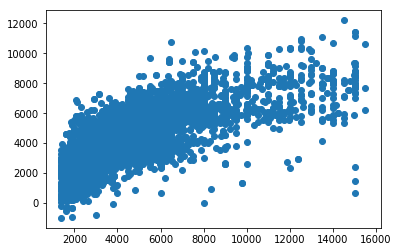

In [193]:
plt.scatter(y_test,predictions)

In [0]:
#Not the best fit 
#Probably too many x vars

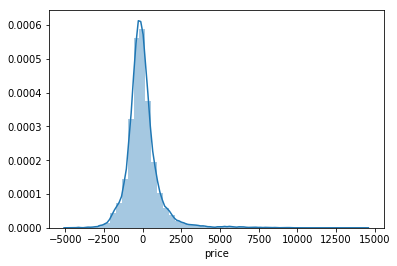

In [196]:
sns.distplot((y_test-predictions))
#at least the residuals are more normally distributed.

In [197]:
metrics.mean_absolute_error(y_test,predictions)

700.7750991231837

In [198]:
metrics.mean_squared_error(y_test, predictions)

1205451.733832079

In [200]:
#Calculate the RMSE so we can see in 'y units' dollars in this case
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1097.9306598470046